<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/Aged_pet_DTG_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df =  pd.read_csv("/content/AGED PET MP.csv")

In [33]:
df.columns
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
label = df['label']
df_res =  df[['time', 'tem', 'heating rate', 'DTG']]
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df = pd.concat([transform_df,root_series(df_res)],axis=1)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG','Root']
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,DTG,Root,label
0,0.000000e+00,1.000000,0.000000,3.980602e-05,311.840000,Training
1,8.906751e-07,0.016664,0.999861,6.633627e-07,18712.398403,Training
2,3.561446e-06,0.033315,0.999445,1.237841e-06,9359.495391,Training
3,8.007957e-06,0.049938,0.998752,1.988073e-06,6243.790134,Training
4,1.422212e-05,0.066519,0.997785,2.648112e-06,4687.532144,Training
...,...,...,...,...,...,...
4049,6.909666e-02,0.997500,0.014781,-1.492915e-05,976.651182,Training
4050,6.910235e-02,0.997500,0.014778,-1.492301e-05,976.811916,Training
4051,6.910734e-02,0.997500,0.014774,-1.491672e-05,976.982627,Training
4052,6.911302e-02,0.997499,0.014770,-1.491058e-05,977.143362,Training


In [34]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']
Root = df_training['Root']

In [35]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="sigmoid"),
        layers.Dense(8, activation="sigmoid"),
        layers.Dense(1),
    ]
) 
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4) 

Epoch 1/50
195/195 [==============================] - 2s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 1.5874e-06 - val_root_mean_squared_error: 0.0013
Epoch 2/50
195/195 [==============================] - 1s 4ms/step - loss: 7.3528e-06 - root_mean_squared_error: 0.0027 - val_loss: 1.2610e-06 - val_root_mean_squared_error: 0.0011
Epoch 3/50
195/195 [==============================] - 1s 3ms/step - loss: 7.3142e-06 - root_mean_squared_error: 0.0027 - val_loss: 8.1996e-07 - val_root_mean_squared_error: 9.0552e-04
Epoch 4/50
195/195 [==============================] - 1s 4ms/step - loss: 7.1991e-06 - root_mean_squared_error: 0.0027 - val_loss: 1.4585e-06 - val_root_mean_squared_error: 0.0012
Epoch 5/50
195/195 [==============================] - 1s 7ms/step - loss: 7.1223e-06 - root_mean_squared_error: 0.0027 - val_loss: 2.4430e-06 - val_root_mean_squared_error: 0.0016
Epoch 6/50
195/195 [==============================] - 1s 5ms/step - loss: 6.9861e-06 - root_mean_squ

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [37]:
met_df  = pd.DataFrame(model.history.history)

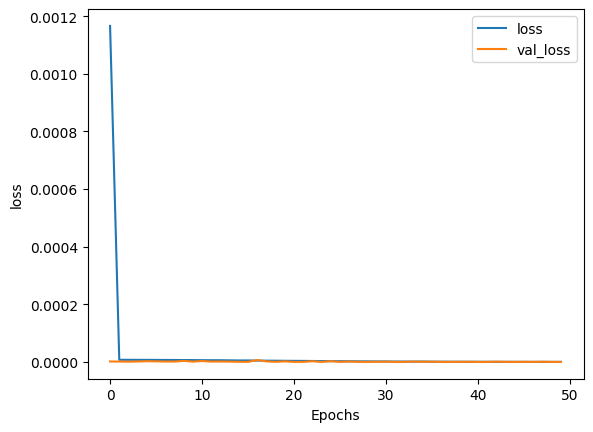

In [38]:
plt.plot(met_df['loss'], label = 'loss')
plt.plot(met_df['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

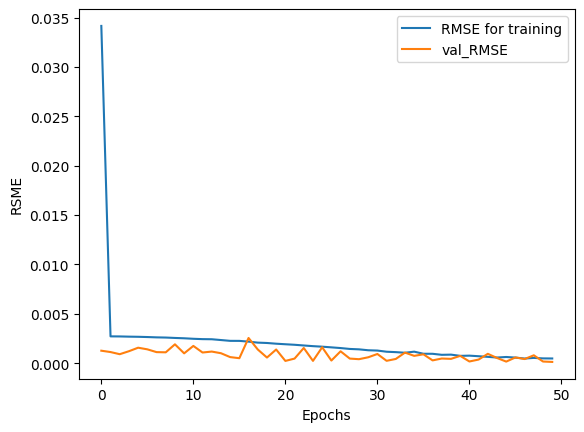

In [39]:
plt.plot(met_df['root_mean_squared_error'], label = 'RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label = 'val_RMSE')
plt.xlabel('Epochs')
plt.ylabel('RSME')
plt.legend()

In [40]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']
Root_val = df_val['Root']
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val) 
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

13/13 [==============================] - 0s 2ms/step


,time,tem,heating rate,preditions,DTG
0,0.000088,0.164399,0.986394,-0.002356,0.000007
1,0.000306,0.301892,0.953342,-0.001405,0.000012
2,0.000630,0.422885,0.906183,-0.000692,0.000016


In [41]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 2.125126271074418e-07
RMSE 0.00046099091868218164
MAE 0.00036833202801881635
R2_Score -211.45991251056168


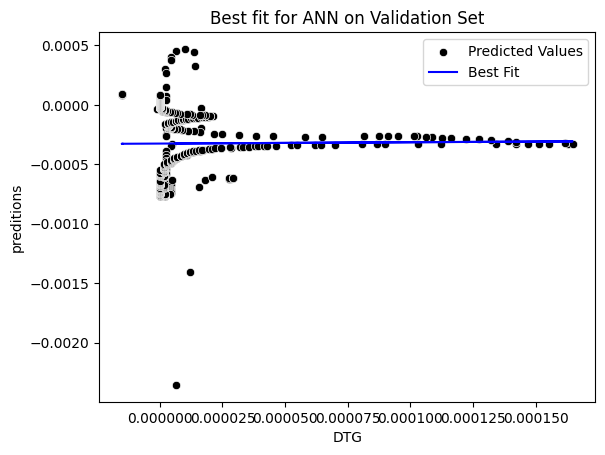

In [43]:
x = final_df['DTG']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df, x='DTG', y='preditions', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='blue', label = 'Best Fit') 
plt.title('Best fit for ANN on Validation Set')
plt.legend()

In [44]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']
Root_test = df_test['Root']
predictions = model.predict(X_test)  
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 2ms/step
MSE 2.2132505528904342e-07
RMSE 0.0004704519691626802
MAE 0.00037107020320536116
R2_Score -222.0003548405779


In [45]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000022,0.083045,0.996546,-0.002983,0.000003
1,0.000337,0.316228,0.948683,-0.001315,0.000013
2,0.000550,0.397607,0.917555,-0.000830,0.000016
3,0.000983,0.514496,0.857493,-0.000238,0.000018
4,0.001692,0.640183,0.768220,0.000233,0.000017
...,...,...,...,...,...
401,0.068849,0.997515,0.014940,0.000086,-0.000015
402,0.068903,0.997512,0.014907,0.000088,-0.000015
403,0.068976,0.997508,0.014862,0.000090,-0.000015
404,0.069053,0.997503,0.014814,0.000092,-0.000015


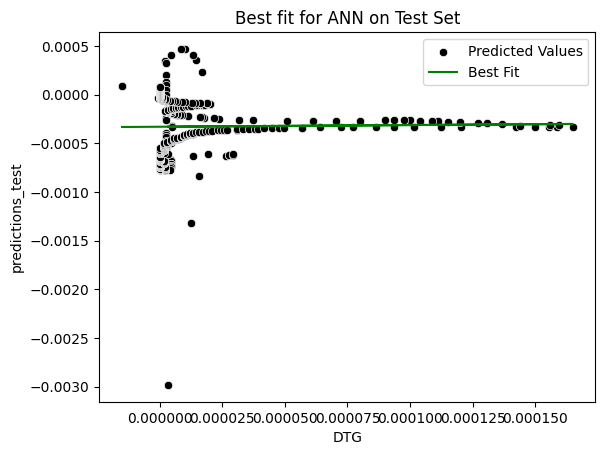

In [46]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df_test, x='DTG', y='predictions_test', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for ANN on Test Set')
plt.legend()

In [47]:
from tensorflow.keras.utils import plot_model

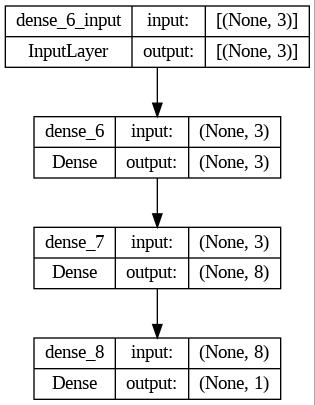

In [48]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)